# Topological Sort
## Lexical topological sorting of a Directed Acyclic Graph (DAG) a.k.a Kahn’s Algorithm

Credit: 
1. https://www.interviewcake.com/concept/java/topological-sort <br>
2. https://www.algotree.org/algorithms/tree_graph_traversal/lexical_topological_sort_python/ <br>

In [1]:
def topological_sort(digraph):
    # digraph is a dictionary:
    #   key: a node
    # value: a set of adjacent neighboring nodes

    # construct a dictionary mapping nodes to their
    # indegrees
    indegrees = {node : 0 for node in digraph}
    for node in digraph:
        for neighbor in digraph[node]:
            indegrees[neighbor] += 1

    # track nodes with no incoming edges
    nodes_with_no_incoming_edges = []
    for node in digraph:
        if indegrees[node] == 0:
            nodes_with_no_incoming_edges.append(node)

    # initially, no nodes in our ordering
    topological_ordering = [] 

    # as long as there are nodes with no incoming edges
    # that can be added to the ordering 
    while len(nodes_with_no_incoming_edges) > 0:

        # add one of those nodes to the ordering
        node = nodes_with_no_incoming_edges.pop()
        topological_ordering.append(node)

        # decrement the indegree of that node's neighbors
        for neighbor in digraph[node]:
            indegrees[neighbor] -= 1
            if indegrees[neighbor] == 0:
                nodes_with_no_incoming_edges.append(neighbor)

    # we've run out of nodes with no incoming edges
    # did we add all the nodes or find a cycle?
    if len(topological_ordering) == len(digraph):
        return topological_ordering  # got them all
    else:
        raise Exception("Graph has a cycle! No topological ordering exists.")

In [2]:
# digraph = {
#   0:[2,5,],
#   1:[3,6,],
#   2:[4,],
#   3:[5,],
#   4:[],  
#   5:[2,4,],
#   6:[2,]
# }
# digraph = [1, 6, 3, 0, 5, 2, 4]

digraph = {0: [2, 5], 1: [3, 6], 2: [4], 3: [5], 4: [], 5: [2, 4], 6: [2]}
#digraph = {0: [2, 5], 1: [3, 6], 2: [4], 3: [5], 5: [2, 4], 6: [2]} # KeyError: 4, # track nodes with no incoming edges

topological_sort(digraph)


[1, 6, 3, 0, 5, 2, 4]

**Time and Space Complexity**
Breaking the algorithm into chunks, we:

Determine the indegree for each node. This is O(M)O(M) time (where MM is the number of edges), since this involves looking at each directed edge in the graph once.**bold text**
Find nodes with no incoming edges. This is a simple loop through all the nodes with some number of constant-time appends. O(N)O(N) time (where NN is the number of nodes).
Add nodes until we run out of nodes with no incoming edges. This loop could run once for every node—O(N)O(N) times. In the body, we:
Do two constant-time operations on a list to add a node to the topological ordering.
Decrement the indegree for each neighbor of the node we added. Over the entire algorithm, we'll end up doing exactly one decrement for each edge, making this step O(M)O(M) time overall.
Check if we included all nodes or found a cycle. This is a fast O(1)O(1) comparison.
All together, the time complexity is O(M+N)O(M+N).

That's the fastest time we can expect, since we'll have to look at all the nodes and edges at least once.

What about space complexity? Here are the data structures we created:

indegrees—this has one entry for each node in the graph, so it's O(N)O(N) space.
nodes_with_no_incoming_edges—in a graph with no edges, this would start out containing every node, so it's O(N)O(N) space in the worst case.
topological_ordering—in a graph with no cycles, this will eventually have every node. O(N)O(N) space.
All in all, we have three structures and they're all O(N)O(N) space. Overall space complexity: O(N)O(N).

This is the best space complexity we can expect, since we must allocate a return array which costs O(N)O(N) space itself.

In [3]:
from collections import defaultdict

#Initializing the Graph Class
class Graph:
    def __init__(self, numberofVertices):
        self.graph = defaultdict(list)
        self.numberofVertices = numberofVertices
    
    def addEdge(self, vertex, edge):
        self.graph[vertex].append(edge)

    #Implementing Topological Sort
    def topogologicalSortUtil(self, v, visited, stack):
        visited.append(v)

        for i in self.graph[v]:
            if i not in visited:
                self.topogologicalSortUtil(i, visited, stack)
            
        stack.insert(0, v)
        
    def topologicalSort(self):
        visited = []
        stack = []

        for k in list(self.graph):
            if k not in visited:
                self.topogologicalSortUtil(k, visited, stack)
            
        print(stack)

tempGraph = Graph(8)
tempGraph.addEdge("A", "C")
tempGraph.addEdge("C", "E")
tempGraph.addEdge("E", "H")
tempGraph.addEdge("E", "F")
tempGraph.addEdge("F", "G")
tempGraph.addEdge("B", "D")
tempGraph.addEdge("B", "C")
tempGraph.addEdge("D", "F")

tempGraph.topologicalSort()

['B', 'D', 'A', 'C', 'E', 'F', 'G', 'H']


# PYTHON : TOPOLOGICAL SORT (LEXICAL ORDERING)
Lexical topological sorting of a Directed Acyclic Graph (DAG) a.k.a Kahn’s Algorithm
## Criteria for lexical topological sorting : 
1. The **smallest vertex with no incoming edges is accessed first** *followed by the vertices on the outgoing paths.* 
2. **If more than one vertex has zero incoming edges,** *the smallest vertex is chosen first to maintain the topological lexical order*.

The idea of the algorithm is mentioned below
## Preprocess edges

While storing an *edge* from the *source node to the destination node*, keep track of the incoming edges (**incoming_edge_count**) for the destination node.
i.e The incoming edge count for the destination node increases with every incoming edge i.e incoming_edge_count [destination] ++


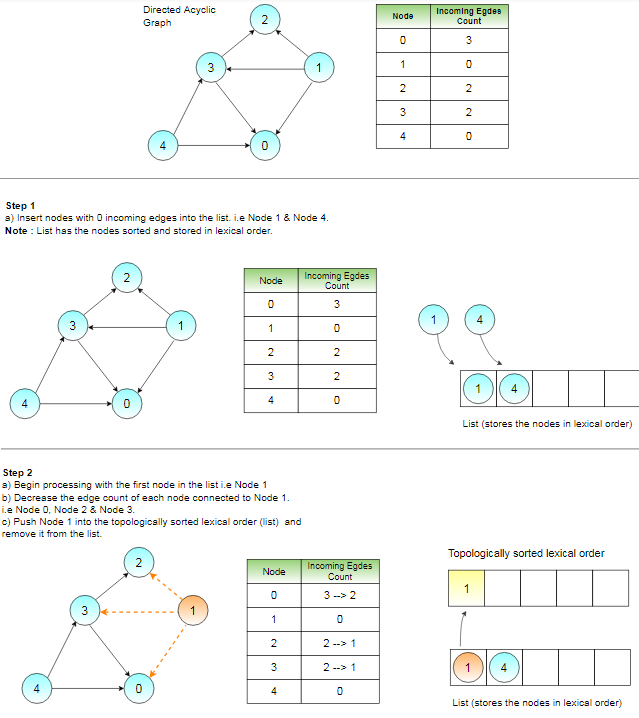

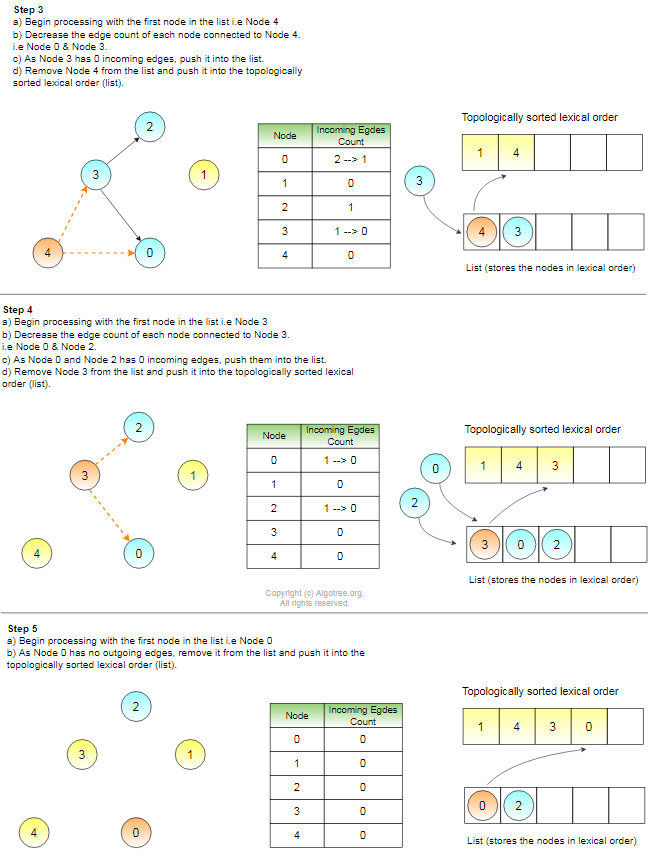
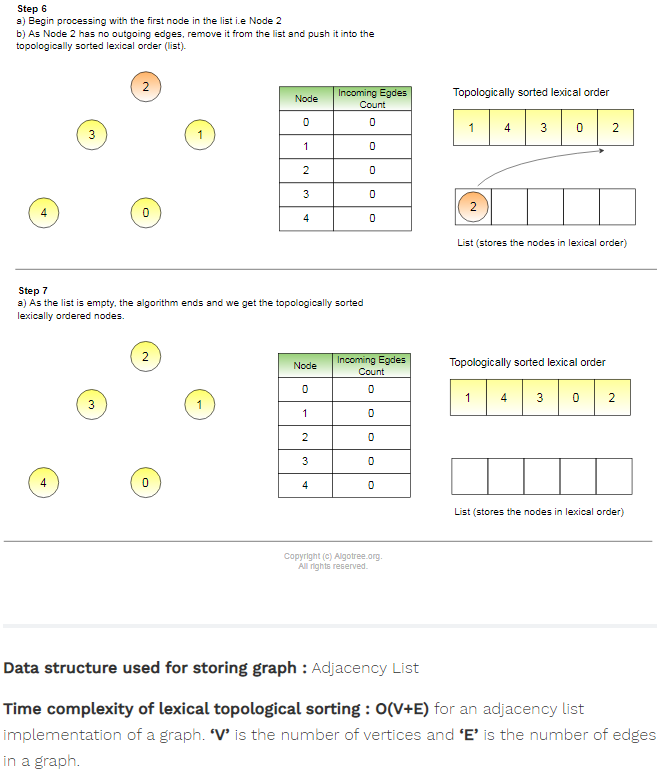

In [4]:
# import pdb
# pdb.set_trace()

from collections import defaultdict

class Graph :

    def __init__(self, nodes : int) :
        self.nodes = nodes
        # adjlit is implemented as a dictionary. The default dictionary would create an empty 
        # list as a default (value) for the nonexistent keys.
        self.adjlist = defaultdict(list)  # Stores the graph in an adjacency list
        self.incoming_edge_count = []     # For a node, it stores the number of incoming edges. 
        self.topo_order = []              # Stores the nodes in lexical topologically sorted order.
        self.zero_incoming_edge_node = [] # Stores the nodes that have zero incoming edges.

    # Create an adjacency list for storing the edges incoming edge count for respective node
    def AddEdge (self, src : int, dst : int) :
        self.adjlist[src].append(dst)
        self.incoming_edge_count[dst] += 1
        # since, "dst" is taking an inward arrow from "src", so counter incremented 

    def TopologicalSort (self) :

        # step 1: adding all nodes with zero incoming edge count to "zero_incoming_edge_node" list
        for node in range(self.nodes) :
            
            if self.incoming_edge_count[node] == 0 :
             # self.incoming_edge_count = [0, 0, 3, 1, 2, 2, 1]

               self.zero_incoming_edge_node.append(node)
             # self.zero_incoming_edge_node = [0, 1]

        while self.zero_incoming_edge_node :
            self.zero_incoming_edge_node.sort()
          # self.zero_incoming_edge_node = [0, 1]

            src = self.zero_incoming_edge_node.pop(0)
          # src = 0

            # Iterate through the adjacency list
                    # self.adjlist = defaultdict(<class 'list'>, {0: [2, 5], 1: [3, 6], 2: [4], 3: [5], 5: [2, 4], 6: [2]})
            if src in self.adjlist :
                for node in self.adjlist[src] :
                          # self.adjlist[src] = [2, 5]
                    self.incoming_edge_count[node] -= 1
                    if self.incoming_edge_count[node] == 0 :
                        self.zero_incoming_edge_node.append(node)

            self.topo_order.append(src)

        print("Topological Sorting In A Lexical Order : " + str(self.topo_order))

def main() :

    node_cnt = 7  # since incoming edge for any node can not be more than node count
    g = Graph(node_cnt)
    g.incoming_edge_count = [0] * node_cnt # For a node, it stores the number of incoming edges.

    g.AddEdge(0,2)
    g.AddEdge(0,5)
    g.AddEdge(1,3)
    g.AddEdge(1,6)
    g.AddEdge(2,4)
    g.AddEdge(3,5)
    g.AddEdge(5,2)
    g.AddEdge(5,4)
    g.AddEdge(6,2)

    g.TopologicalSort()

if __name__ == "__main__" :
    main()
# [0, 1, 3, 5, 6, 2, 4]

Topological Sorting In A Lexical Order : [0, 1, 3, 5, 6, 2, 4]


# Time and Space Complexity for Topological Sort
* The **time complexity** for the Topological Sort Algorithm is **O(V+E)** where **“V”** and **“E”** are the numbers of **vertices** and **edges** of the graph respectively. 
* We need to traverse all nodes of the graph for implementation. The **space complexity** is **O(V+E)** because an additional stack memory is required to store temporary data.